In [ ]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.9MB 6.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [ ]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
insurance_data.isnull().mean()

Agency                  0.000000
Agency Type             0.000000
Distribution Channel    0.000000
Product Name            0.000000
Duration                0.000000
Destination             0.000000
Net Sales               0.000000
Commision (in value)    0.000000
Gender                  0.711998
Age                     0.000000
Claim                   0.000000
dtype: float64

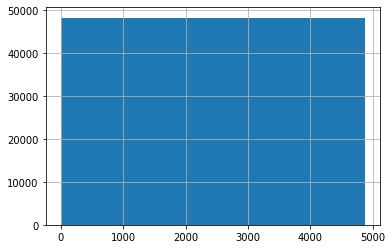

In [ ]:
insurance_data['Duration'].hist(bins=1)

In [ ]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [ ]:
insurance_data.groupby('Gender').sum()

,Duration,Net Sales,Commision (in value),Age,Claim
Gender,,,,,
F,511272,402862.68,128100.12,291072,255
M,441033,399729.27,129066.75,331410,228


In [ ]:
insurance_data['Gender'].fillna('Not Specified', inplace=True)

In [ ]:
insurance_data = insurance_data.drop(['Distribution Channel', 'Destination', 'Agency Type'], axis =1 )

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto',
                       drop='first', # to return k-1, use drop=false to return k dummies
                       sparse=False,
                       handle_unknown='error') # helps deal with rare labels
encoder.fit(insurance_data.fillna('Missing'))

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
encoder.categories_

[array(['ADM', 'ART', 'C2B', 'CBH', 'CCR', 'CSR', 'CWT', 'EPX', 'JWT',
        'JZI', 'KML', 'LWC', 'RAB', 'SSI', 'TST', 'TTW'], dtype=object),
 array(['1 way Comprehensive Plan', '2 way Comprehensive Plan',
        '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan',
        'Annual Travel Protect Gold', 'Annual Travel Protect Platinum',
        'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan',
        'Cancellation Plan', 'Child Comprehensive Plan',
        'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan',
        'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan',
        'Single Trip Travel Protect Gold',
        'Single Trip Travel Protect Platinum',
        'Single Trip Travel Protect Silver',
        'Spouse or Parents Comprehensive Plan', 'Ticket Protector',
        'Travel Cruise Protect', 'Travel Cruise Protect Family',
        'Value Plan'], dtype=object),
 array([  -2,   -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,


In [ ]:

insurance_data.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0
1,EPX,Cancellation Plan,93,63.0,0.00,Not Specified,36,0
2,EPX,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0
3,C2B,Silver Plan,14,54.5,13.63,M,24,0
4,EPX,Cancellation Plan,90,10.0,0.00,Not Specified,23,0


In [ ]:
insurance_data = pd.get_dummies(insurance_data, columns=['Agency', 'Product Name','Gender'], drop_first=True)

In [ ]:
insurance_data.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Gender_M,Gender_Not Specified
0,61,19.8,11.88,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,93,63.0,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,22,22.0,0.00,25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14,54.5,13.63,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(insurance_data.drop(['Claim'], axis=1),
                                                    insurance_data['Claim'],
                                                    test_size=0.3,
                                                    random_state=101)

X_train.shape, X_test.shape

((33782, 46), (14478, 46))

In [ ]:
insurance_data.groupby('Claim').count()

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Gender_M,Gender_Not Specified
Claim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552,47552
1,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=25, sampling_strategy = 1.0 )
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_SMOTE.shape, y_train_SMOTE.shape

((66538, 46), (66538,))

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train_SMOTE, y_train_SMOTE)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_train_SMOTE, y_train_SMOTE)


0.7691544681234783

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_model=f1_score(y_test,y_pred,average='weighted',labels=np.unique(y_pred))

In [ ]:
print("F1 score Model 1 : ",f1_model)

F1 score Model 1 :  0.8947272591464563


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     14283
           1       0.05      0.65      0.09       195

    accuracy                           0.83     14478
   macro avg       0.52      0.74      0.50     14478
weighted avg       0.98      0.83      0.89     14478



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train_SMOTE,y_train_SMOTE)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14283
           1       0.05      0.09      0.06       195

    accuracy                           0.96     14478
   macro avg       0.52      0.53      0.52     14478
weighted avg       0.97      0.96      0.97     14478



In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14283
           1       0.06      0.07      0.07       195

    accuracy                           0.97     14478
   macro avg       0.53      0.53      0.53     14478
weighted avg       0.97      0.97      0.97     14478



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [ ]:
rfc=RandomForestClassifier(random_state=1)

param_grid = { 
    'bootstrap': [True],
    'max_depth': [10, 20],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [4, 6],
    'n_estimators': [100, 200],

}

CV_rfc = GridSearchCV(estimator = rfc, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
CV_rfc.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
CV_rfc.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
CV_rfc_pred = CV_rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,CV_rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14283
           1       0.06      0.13      0.08       195

    accuracy                           0.96     14478
   macro avg       0.53      0.55      0.53     14478
weighted avg       0.98      0.96      0.97     14478



In [ ]:
rfc2=RandomForestClassifier(random_state=1)

param_grid2 = { 
    'bootstrap': [True],
    'max_leaf_nodes': [5, 10, 15, 20],
    'min_samples_split': [4, 6, 8, 10],
    'n_estimators':[200]


}

CV_rfc2 = GridSearchCV( estimator = rfc2,param_grid=param_grid2, cv=3, verbose=2, n_jobs=-1)

In [ ]:
CV_rfc2.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
CV_rfc2.best_params_

{'bootstrap': True,
 'max_leaf_nodes': 20,
 'min_samples_split': 4,
 'n_estimators': 200}

In [ ]:
CV_rfc2.

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_st

In [ ]:
CV_rfc2_pred = CV_rfc2.predict(X_test)

In [ ]:
len(X_test.columns)

46

In [ ]:
print(classification_report(y_test,CV_rfc2_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14283
           1       0.06      0.59      0.11       195

    accuracy                           0.87     14478
   macro avg       0.53      0.73      0.52     14478
weighted avg       0.98      0.87      0.92     14478



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np

rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
#rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
RFE_selector = RFE(rfc,  step=1)   # initialize the boruta selector
RFE_selector.fit(np.array(X_train_SMOTE), np.array(y_train_SMOTE))  
#rfe = RFECV(estimator=DecisionTreeClassifier())
#rfc = RandomForestClassifier(random_state=1)
#pipeline = Pipeline(steps=[('s',rfe),('m',rfc)])
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(pipeline, X_train_SMOTE, y_train_SMOTE, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


RFE(estimator=RandomForestClassifier(max_depth=5, n_estimators=1000,
                                     random_state=1))

In [ ]:
print("Selected Features: ", RFE_selector.support_)    # check selected features
 

print("Ranking: ",RFE_selector.ranking_)               # check ranking of features

print("No. of significant features: ", RFE_selector.n_features_)


Selected Features:  [ True  True  True  True False  True False False False  True  True  True
  True False  True False False False False  True False False  True  True
 False False  True  True  True False False  True False False  True  True
  True False False False False False False  True  True  True]
Ranking:  [ 1  1  1  1 12  1 22 20 23  1  1  1  1  8  1  3  5  4 13  1 18 11  1  1
 17  9  1  1  1 21 15  1 14 19  1  1  1  2 10 16  6  7 24  1  1  1]
No. of significant features:  23


In [ ]:

selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':RFE_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,Duration,1
43,Product Name_Value Plan,1
36,Product Name_Single Trip Travel Protect Gold,1
35,Product Name_Silver Plan,1
34,Product Name_Rental Vehicle Excess Insurance,1
31,Product Name_Gold Plan,1
28,Product Name_Cancellation Plan,1
27,Product Name_Bronze Plan,1
26,Product Name_Basic Plan,1
23,Product Name_Annual Travel Protect Gold,1


In [ ]:
X_important_train = RFE_selector.transform(np.array(X_train_SMOTE))
X_important_test = RFE_selector.transform(np.array(X_test))


In [ ]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train_SMOTE)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

In [ ]:
rf_important_pred = rf_important.predict(X_important_test)

In [ ]:
print(classification_report(y_test,rf_important_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14283
           1       0.06      0.06      0.06       195

    accuracy                           0.97     14478
   macro avg       0.52      0.52      0.52     14478
weighted avg       0.97      0.97      0.97     14478



# Test Data

---



In [ ]:
import pandas as pd
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [ ]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [ ]:
test_data['Gender'].fillna('Not Specified', inplace=True)

In [ ]:
test_data = test_data.drop(['Distribution Channel', 'Destination', 'Agency Type'], axis =1 )

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto',
                       drop='first', # to return k-1, use drop=false to return k dummies
                       sparse=False,
                       handle_unknown='error') # helps deal with rare labels
encoder.fit(test_data.fillna('Missing'))

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
test_data = pd.get_dummies(test_data, columns=['Agency', 'Product Name','Gender'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
rfc2=RandomForestClassifier(random_state=1)
param_grid2 = { 
    'bootstrap': [True],
    'max_leaf_nodes': [5, 10, 15, 20],
    'min_samples_split': [4, 6, 8, 10],
    'n_estimators':[200]


}

CV_rfc2 = GridSearchCV( estimator = rfc2,param_grid=param_grid2, cv=3, verbose=2, n_jobs=-1)

In [ ]:
test_data['Product Name_Travel Cruise Protect Family'] = 0

In [ ]:
X_test= X_test.drop(['Product Name_Travel Cruise Protect Family'],axis=1)

In [ ]:
predictions= CV_rfc2.predict(test_data)


#from imblearn.over_sampling import SMOTE
#smt = SMOTE(random_state=25, sampling_strategy = 1.0 )
#test_data_SMOTE = smt.fit_sample(test_data)

In [ ]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"] 

In [ ]:
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>